## This notebook explores the training data of network connection information
#### **Background set-up notes**
#### I loaded in a file that I generated based on the data set given and added column names.
#### I export the data into a pickle format for quick load

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb

train_file = 'train_df.pkl'

pd.set_option('display.max_columns', None)

## Initial load of CSV and set column names 

In [2]:
# train_df = pd.read_csv(train_file, names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
#                                           'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
#                                           'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
#                                           'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
#                                           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
#                                           'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
#                                           'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
#                                           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
#                                           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
#                                           'dst_host_srv_rerror_rate','category'])

## Load the training data, verify the shape, and check for nulls

In [3]:
train_df = pd.read_pickle(train_file)
train_df.shape

(4898431, 42)

In [4]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,category
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


#### No missing data!

In [5]:
print("Missing values: {}".format(train_df.isnull().sum().sum()))

Missing values: 0


## View summary of data 
#### There are 4 non-numeric categorical variables; 6 are binary (0 and 1)
#### Upon inspecting the data I found 1 variable that was constant, num_outbound_cmds
#### The data is predominantly coming from ICMP and TCP protocols (38% and 58%, respecitively) with UDP(4%)
#### of the 6 binary variables 1 looked to be a an important feature in that it impacts


In [6]:
train_df.info(verbose=True, null_counts=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     4898431 non-null  int64  
 1   protocol_type                4898431 non-null  object 
 2   service                      4898431 non-null  object 
 3   flag                         4898431 non-null  object 
 4   src_bytes                    4898431 non-null  int64  
 5   dst_bytes                    4898431 non-null  int64  
 6   land                         4898431 non-null  int64  
 7   wrong_fragment               4898431 non-null  int64  
 8   urgent                       4898431 non-null  int64  
 9   hot                          4898431 non-null  int64  
 10  num_failed_logins            4898431 non-null  int64  
 11  logged_in                    4898431 non-null  int64  
 12  num_compromised              4898431 non-n

In [7]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4898431.0,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,3.674646e-05,1.293496e-02,1.188748e-03,7.430951e-05,1.021143e-03,0.0,4.082940e-07,8.351654e-04,3.349734e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766509e-02,5.773010e-02,7.898842e-01,2.117961e-02,2.826080e-02,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,8.082432e-03,3.938075e+00,1.241857e-01,8.737590e-03,3.551048e-02,0.0,6.389788e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892958e-01,8.271458e-02,1.405596e-01,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [8]:
#train_df.min(), train_df.max()
stats_train_df = train_df.loc[0:].describe().transpose()
stats_train_df.shape

(38, 8)

## num_outbound_cmds contains all 0 values, which is constant, target feature for removal

In [9]:
train_df.num_outbound_cmds.value_counts()

0    4898431
Name: num_outbound_cmds, dtype: int64

In [10]:
stats_train_df

,count,mean,std,min,25%,50%,75%,max
duration,4898431.0,4.834243e+01,723.329811,0.0,0.00,0.0,0.00,5.832900e+04
src_bytes,4898431.0,1.834621e+03,941431.074484,0.0,45.00,520.0,1032.00,1.379964e+09
dst_bytes,4898431.0,1.093623e+03,645012.333754,0.0,0.00,0.0,0.00,1.309937e+09
land,4898431.0,5.716116e-06,0.002391,0.0,0.00,0.0,0.00,1.000000e+00
wrong_fragment,4898431.0,6.487792e-04,0.042854,0.0,0.00,0.0,0.00,3.000000e+00
urgent,4898431.0,7.961733e-06,0.007215,0.0,0.00,0.0,0.00,1.400000e+01
hot,4898431.0,1.243766e-02,0.468978,0.0,0.00,0.0,0.00,7.700000e+01
num_failed_logins,4898431.0,3.205108e-05,0.007299,0.0,0.00,0.0,0.00,5.000000e+00
logged_in,4898431.0,1.435290e-01,0.350612,0.0,0.00,0.0,0.00,1.000000e+00
num_compromised,4898431.0,8.088304e-03,3.856481,0.0,0.00,0.0,0.00,7.479000e+03


### Check value counts for each feature
#### This wasn't helpful, so commenting out for now

In [11]:
# for c in train_df.columns:
#     print("Featur: %s --->" % c)
#     print(train_df[c].value_counts())

## Take a look at the categorical variables and their distributions

In [12]:
train_df['protocol_type'].unique(), train_df['protocol_type'].value_counts()

(array(['tcp', 'udp', 'icmp'], dtype=object),
 icmp    2833545
 tcp     1870598
 udp      194288
 Name: protocol_type, dtype: int64)

In [13]:
len(train_df['service'].unique()),train_df['service'].unique(), train_df['service'].value_counts()

(70,
 array(['http', 'smtp', 'domain_u', 'auth', 'finger', 'telnet', 'eco_i',
        'ftp', 'ntp_u', 'ecr_i', 'other', 'urp_i', 'private', 'pop_3',
        'ftp_data', 'netstat', 'daytime', 'ssh', 'echo', 'time', 'name',
        'whois', 'domain', 'mtp', 'gopher', 'remote_job', 'rje', 'ctf',
        'supdup', 'link', 'systat', 'discard', 'X11', 'shell', 'login',
        'imap4', 'nntp', 'uucp', 'pm_dump', 'IRC', 'Z39_50', 'netbios_dgm',
        'ldap', 'sunrpc', 'courier', 'exec', 'bgp', 'csnet_ns', 'http_443',
        'klogin', 'printer', 'netbios_ssn', 'pop_2', 'nnsp', 'efs',
        'hostnames', 'uucp_path', 'sql_net', 'vmnet', 'iso_tsap',
        'netbios_ns', 'kshell', 'urh_i', 'http_2784', 'harvest', 'aol',
        'tftp_u', 'http_8001', 'tim_i', 'red_i'], dtype=object),
 ecr_i        2811660
 private      1100831
 http          623091
 smtp           96554
 other          72653
               ...   
 tftp_u             3
 http_8001          2
 aol                2
 harvest     

In [14]:
train_df['flag'].unique(), train_df['flag'].value_counts()

(array(['SF', 'S2', 'S1', 'S3', 'OTH', 'REJ', 'RSTO', 'S0', 'RSTR',
        'RSTOS0', 'SH'], dtype=object),
 SF        3744328
 S0         869829
 REJ        268874
 RSTR         8094
 RSTO         5344
 SH           1040
 S1            532
 S2            161
 RSTOS0        122
 OTH            57
 S3             50
 Name: flag, dtype: int64)

## Inspect binary categorical vars (6)

#### logged in - Important feature!! (1 of 6)
#### 85% of connections logged in = 0; decent distribution of normal and attacks across both logged in 0 and 1 

In [15]:
train_df['logged_in'].value_counts()

0    4195364
1     703067
Name: logged_in, dtype: int64

In [16]:
(len(train_df[train_df.logged_in==0])/len(train_df)) * 100

85.64709801975367

In [17]:
li0_train_df = train_df[train_df.logged_in==0]
li0_train_df.shape

(4195364, 42)

#### logged_in = 0 and 1 both are well spread accross the attack categories

In [18]:
li0_train_df['category'].value_counts()

smurf.           2807886
neptune.         1072016
normal.           273091
satan.             15835
ipsweep.           12453
portsweep.         10410
nmap.               2316
teardrop.            979
pod.                 264
guess_passwd.         52
land.                 21
warezmaster.          18
imap.                 11
rootkit.               5
multihop.              3
ftp_write.             2
spy.                   1
loadmodule.            1
Name: category, dtype: int64

In [19]:
li1_train_df = train_df[train_df.logged_in==1]
li1_train_df.shape

(703067, 42)

In [20]:
li1_train_df['category'].value_counts()

normal.             699690
back.                 2203
warezclient.          1020
satan.                  57
buffer_overflow.        30
ipsweep.                28
loadmodule.              8
ftp_write.               6
rootkit.                 5
phf.                     4
multihop.                4
portsweep.               3
perl.                    3
warezmaster.             2
neptune.                 1
guess_passwd.            1
imap.                    1
spy.                     1
Name: category, dtype: int64

#### land - table feature for now (2 of 6)
#### .0005 of training data

In [21]:
train_df['land'].value_counts()

0    4898403
1         28
Name: land, dtype: int64

In [22]:
(len(train_df[train_df.land==1])/len(train_df)) * 100

0.0005716116037972159

#### is_guest_login - table feature for now (3 of 6)
#### 0.08% of training set
#### May be worth including in training data; there have been some bad connections when guest login was true

In [23]:
train_df['is_guest_login'].value_counts()

0    4894340
1       4091
Name: is_guest_login, dtype: int64

In [24]:
(len(train_df[train_df.is_guest_login==1])/len(train_df)) * 100

0.08351653825480036

In [25]:
gli_train_df = train_df[train_df.is_guest_login==1]

In [26]:
gli_train_df['category'].value_counts()

normal.          3776
warezclient.      307
warezmaster.        2
ftp_write.          2
multihop.           2
satan.              1
guess_passwd.       1
Name: category, dtype: int64

#### is_host_login - table feature for now (4 of 6)
#### only 2 records(0.00004% of training data) and normal connection type. 
#### Not enough data to impact model

In [27]:
train_df['is_host_login'].value_counts()

0    4898429
1          2
Name: is_host_login, dtype: int64

In [28]:
(len(train_df[train_df.is_host_login==1])/len(train_df)) * 100

4.082940027122971e-05

In [29]:
train_df[train_df.is_host_login==1]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,category
421138,49,tcp,telnet,SF,187,7751,0,0,0,1,0,1,10,0,0,10,0,0,0,0,1,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,18,0.07,0.58,0.0,0.0,0.58,0.17,0.0,0.06,normal.
4469161,0,tcp,telnet,S1,286,2942,0,0,0,1,0,1,6,0,0,9,0,0,0,0,1,0,2,1,0.5,1.0,0.0,0.0,0.5,1.0,0.0,255,1,0.00,0.02,0.0,0.0,0.00,1.00,0.0,0.00,normal.


#### su_attempted - table feature for now (5 of 6)
#### .0008 % of training data
#### suspicious data - contains values of '2' which is not valid per feature data dictionary

In [30]:
train_df['su_attempted'].value_counts()

0    4898321
2         70
1         40
Name: su_attempted, dtype: int64

In [31]:
(len(train_df[train_df.su_attempted==1])/len(train_df)) * 100

0.0008165880054245941

In [32]:
sua1_train_df = train_df[train_df.su_attempted==1]

In [33]:
sua1_train_df['category'].value_counts()

normal.    39
spy.        1
Name: category, dtype: int64

In [34]:
sua2_train_df = train_df[train_df.su_attempted==2]

In [35]:
sua2_train_df['category'].value_counts()

normal.    70
Name: category, dtype: int64

#### root_shell - table feature for now (6 of 6)
#### .0068 % of data

In [36]:
train_df['root_shell'].value_counts()

0    4898097
1        334
Name: root_shell, dtype: int64

In [37]:
(len(train_df[train_df.root_shell==1])/len(train_df)) * 100

0.006818509845295361

## Take a look at the relationship within the groups of features
#### Features seem to be highly positively and negatively correlation to eachother... I will take a look at
#### reducing the dimensionality using this information

## DF of Host based traffic features

In [38]:
traffic_train_df = train_df[['dst_host_count','dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','category']]
traffic_train_df.shape

(4898431, 11)

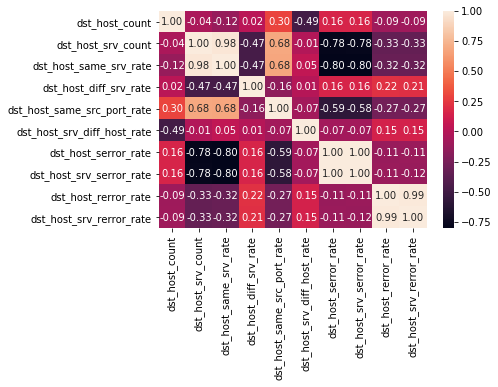

In [39]:
traffic_corr_heatmap = sb.heatmap(traffic_train_df.corr(),annot=True,fmt='0.2f')

## Create DF for SameService Connections

In [40]:
ss_train_df = train_df[['srv_serror_rate','srv_rerror_rate','srv_diff_host_rate','category']]
ss_train_df.shape

(4898431, 4)

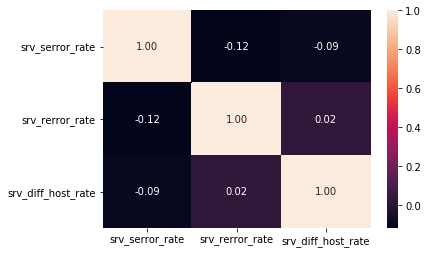

In [41]:
ss_corr_heatmap = sb.heatmap(ss_train_df.corr(),annot=True,fmt='0.2f')

## Create DF for SameHost Connections

In [42]:
sh_train_df = train_df[['serror_rate','rerror_rate','same_srv_rate','diff_srv_rate','srv_count','category']]
sh_train_df.shape

(4898431, 6)

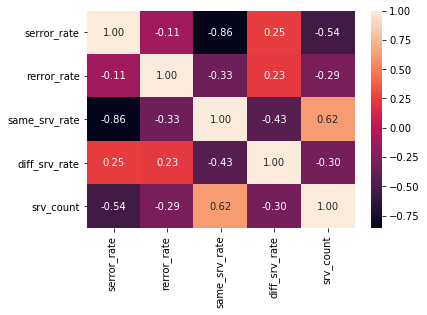

In [43]:
sh_corr_heatmap = sb.heatmap(sh_train_df.corr(),annot=True, fmt='0.2f')